Importing Required Libraries

In [5]:
import json
from scipy import signal
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

Import model predict from train_model.py

In [6]:
from train_model import predict

Getting the DataFrame and normalizing it to improve performance

In [7]:
p = predict()
df = p.json_to_df()
df = p.normalize(df)
df

,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Input Power,Pump Discharge Volumetric Flow,Pump Shaft Speed,Pump Suction Temperature,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Pressure.1,Motor Current Phase B,Motor Voltage,...,Pump Discharge Pressure,Pump Radial Bearing Vibration,Pump Suction Strainer Differential Pressure,Auxiliary Boilers A/B Feed Water Header Pressure 2,Heat Recovery System Header Pressure,Motor Current Phase A,Motor Power Factor,Pump Journal 1 Bearing Temperature,Pump Suction Pressure 1,Pump Thrust Bearing Temperature 1
0,0.904326,0.841026,0.0,0.671439,0.999724,0.996523,0.947779,0.965451,0.795274,0.991667,...,0.933147,0.802076,0.424581,0.948942,0.964339,0.791839,0.0,0.972713,0.918980,0.926025
1,0.900867,0.840995,0.0,0.672978,0.999724,0.996914,0.954142,0.965448,0.791853,0.990178,...,0.933372,0.802915,0.416976,0.954205,0.964259,0.789937,0.0,0.972703,0.919209,0.926068
2,0.905537,0.840963,0.0,0.673310,0.999724,0.997267,0.956886,0.965445,0.789937,0.991398,...,0.933598,0.805031,0.416267,0.958328,0.964293,0.789937,0.0,0.972694,0.919437,0.926111
3,0.904331,0.840932,0.0,0.672619,0.999724,0.997222,0.956373,0.965443,0.789937,0.992297,...,0.933824,0.807146,0.416097,0.956609,0.964327,0.789937,0.0,0.972684,0.918923,0.926154
4,0.903879,0.840900,0.0,0.673557,0.999724,0.997177,0.955860,0.965440,0.789937,0.991228,...,0.934049,0.809262,0.415927,0.954444,0.964361,0.789937,0.0,0.972675,0.915493,0.926196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92155,0.935715,0.760540,0.0,0.737149,0.999426,0.992640,0.957286,0.865087,0.918035,0.987540,...,0.867399,0.789052,0.642275,0.953729,0.901661,0.869998,0.0,0.921355,0.934349,0.835169
92156,0.937065,0.760360,0.0,0.736988,0.999426,0.992637,0.956767,0.865146,0.918035,0.988005,...,0.867491,0.793599,0.644491,0.953840,0.901810,0.869998,0.0,0.921347,0.935840,0.835136
92157,0.935192,0.760180,0.0,0.733754,0.999426,0.992633,0.956085,0.865204,0.912697,0.988073,...,0.867584,0.798146,0.646708,0.953951,0.901958,0.873426,0.0,0.921339,0.937331,0.835102
92158,0.935371,0.760000,0.0,0.733631,0.999426,0.992630,0.955321,0.865262,0.916638,0.986436,...,0.867676,0.802694,0.648924,0.954062,0.902107,0.871534,0.0,0.921331,0.938822,0.835069


Generating coefficient matrix to find correlations between different factors

In [15]:
corrM = df.corr()
corrM

,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Input Power,Pump Discharge Volumetric Flow,Pump Shaft Speed,Pump Suction Temperature,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Pressure.1,Motor Current Phase B,Motor Voltage,...,Pump Discharge Pressure,Pump Radial Bearing Vibration,Pump Suction Strainer Differential Pressure,Auxiliary Boilers A/B Feed Water Header Pressure 2,Heat Recovery System Header Pressure,Motor Current Phase A,Motor Power Factor,Pump Journal 1 Bearing Temperature,Pump Suction Pressure 1,Pump Thrust Bearing Temperature 1
Heat Recovery System Header Mass Flow.1,1.000000,-0.123842,NaN,0.527667,-0.260350,-0.070039,0.005810,-0.401915,0.427470,-0.186161,...,-0.457448,-0.354231,0.381942,0.003851,-0.464998,0.487128,NaN,-0.137551,-0.266045,-0.127852
Lube Oil Tank Temperature,-0.123842,1.000000,NaN,0.036870,-0.269602,-0.168622,-0.014950,0.078961,-0.096898,-0.025906,...,0.061828,-0.329666,-0.042911,-0.010924,-0.006771,-0.003225,NaN,0.832386,-0.346212,0.882167
Motor Input Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pump Discharge Volumetric Flow,0.527667,0.036870,NaN,1.000000,-0.504622,-0.464438,0.007063,-0.609241,0.617307,-0.317228,...,-0.782747,-0.602058,0.764203,-0.010081,-0.821445,0.815246,NaN,0.066327,-0.555380,0.017778
Pump Shaft Speed,-0.260350,-0.269602,NaN,-0.504622,1.000000,0.292903,-0.012136,0.360513,-0.357387,0.292461,...,0.391721,0.384875,-0.391019,-0.011671,0.473108,-0.469372,NaN,-0.231355,0.398755,-0.201004
Pump Suction Temperature,-0.070039,-0.168622,NaN,-0.464438,0.292903,1.000000,0.009873,0.272693,-0.264072,0.143492,...,0.347024,0.142727,-0.370890,0.007122,0.394093,-0.377683,NaN,-0.106900,0.353648,-0.075066
Auxiliary Boilers Feed Water Header Pressure,0.005810,-0.014950,NaN,0.007063,-0.012136,0.009873,1.000000,0.020326,-0.017901,-0.008440,...,0.011955,0.020652,-0.015422,0.483438,-0.002640,0.001951,NaN,-0.004434,0.070501,-0.011732
Heat Recovery System Header Pressure.1,-0.401915,0.078961,NaN,-0.609241,0.360513,0.272693,0.020326,1.000000,-0.994795,0.474283,...,0.828979,0.578680,-0.815099,0.000815,0.766078,-0.777729,NaN,-0.006445,0.534942,0.060960
Motor Current Phase B,0.427470,-0.096898,NaN,0.617307,-0.357387,-0.264072,-0.017901,-0.994795,1.000000,-0.471773,...,-0.820442,-0.575515,0.802670,-0.002467,-0.777008,0.792594,NaN,-0.014209,-0.531614,-0.080245
Motor Voltage,-0.186161,-0.025906,NaN,-0.317228,0.292461,0.143492,-0.008440,0.474283,-0.471773,1.000000,...,0.457241,0.272322,-0.460437,-0.009937,0.327210,-0.330724,NaN,0.004421,0.224529,0.004162


Finding those with low relation to target variable

In [27]:
remove = []
for i in dict(corrM['Pump Radial Bearing Vibration']):
    if abs(corrM['Pump Radial Bearing Vibration'][i]) <= 0.3:
        print(i, corrM['Pump Radial Bearing Vibration'][i])
        remove.append(i)
print(remove)

Heat Recovery System Header Mass Flow.1 -0.3542312039912787
Lube Oil Tank Temperature -0.32966618195029773
Pump Discharge Volumetric Flow -0.6020578722701801
Pump Suction Temperature 0.14272721371102504
Auxiliary Boilers Feed Water Header Pressure 0.02065242248995939
Motor Current Phase B -0.5755151770381122
Motor Voltage 0.27232241352540404
Pump Journal 2 Bearing Temperature -0.3886419129333335
Pump Thrust Bearing Temperature 2 -0.44510946491439457
Heat Recovery System Header Mass Flow -0.40215722031053647
Lube Oil Cooler Outlet Temperature -0.46659059738272135
Motor Current Phase C -0.6978567999709857
Pump Suction Strainer Differential Pressure -0.6625751975426539
Auxiliary Boilers A/B Feed Water Header Pressure 2 0.0050812716673621075
Motor Current Phase A -0.4837560141807397
Pump Journal 1 Bearing Temperature -0.3837536738171619
Pump Thrust Bearing Temperature 1 -0.36184533075893716
['Heat Recovery System Header Mass Flow.1', 'Lube Oil Tank Temperature', 'Pump Discharge Volumetric 

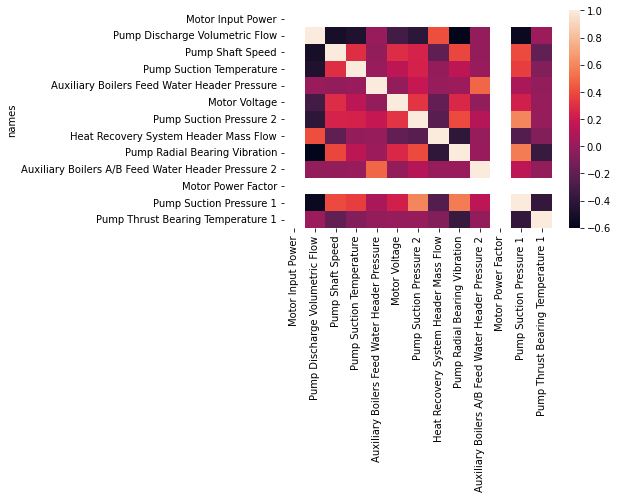

In [46]:
sn.heatmap(corrM, annot=False)
plt.show()